# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
# %matplotlib inline                                  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby('type').count()['ride_id']

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby('type').sum()['driver_count']

In [5]:
#  3. Get the total amount of fares for each city type
total_fare = pyber_data_df.groupby('type').sum()['fare']

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare = pyber_data_df.groupby('type').mean()['fare']

In [7]:
# 5. Get the average fare per driver (per ride??) for each city type. 
fare_per_driver = pyber_data_df.groupby('type').sum()['fare'] / city_data_df.groupby('type').sum()['driver_count']

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    'total_rides': total_rides,
    'total_drivers': total_drivers,
    'total_fare': total_fare,
    'avg_fare': avg_fare,
    'fare_per_driver': fare_per_driver
})
pyber_summary_df

,total_rides,total_drivers,total_fare,avg_fare,fare_per_driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
def format_summarry(df_i):
    
    df = df_i.copy()
    
    df['total_rides'] = df['total_rides'].map('{:,}'.format)
    df['total_fare'] = df['total_fare'].map('${:,.2f}'.format)
    df['avg_fare'] = df['avg_fare'].map('${:,.2f}'.format)
    df['fare_per_driver'] = df['fare_per_driver'].map('${:,.2f}'.format)
    
    return df
        
format_summarry(pyber_summary_df)

,total_rides,total_drivers,total_fare,avg_fare,fare_per_driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625",2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'])

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

# using groupby to create the indices, also pd.Grouper() make an object of the days
pyber_data_df = pyber_data_df.groupby(['type', pd.Grouper(key='date', freq='D')]).sum()

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_df = pyber_data_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_date_type = pyber_data_df.pivot_table(values='fare', columns='type', index='date')

In [52]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pivot_df.index = pd.to_datetime(pivot_df.index)
pivot_df.index.dtype

dtype('<M8[ns]')

In [53]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pivot_df = pivot_date_type.loc['2019-01-01':'2019-04-29']
pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30


In [54]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [55]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_df = pivot_df.resample(rule='W').sum()
pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [56]:
pivot_df = pivot_df.loc[:'2019-04-28',:]
pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


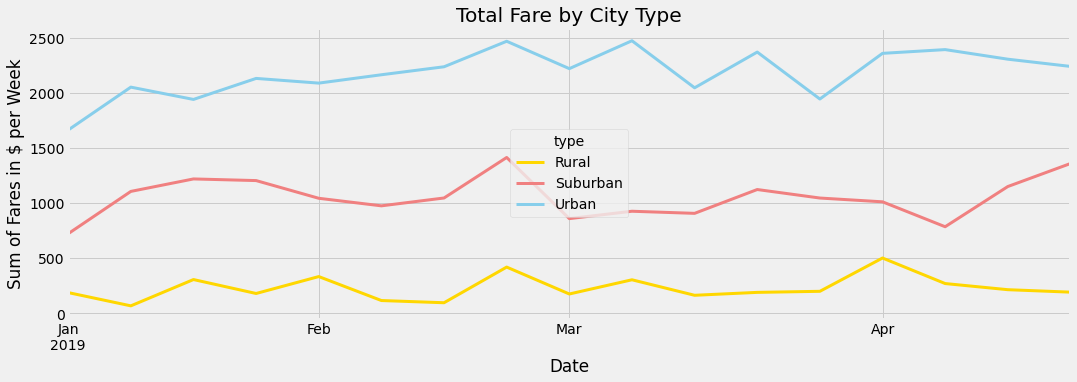

In [34]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
pivot_df.plot.line(figsize=(16,5), linewidth=3, color=['gold', 'lightcoral', 'skyblue'])
plt.title('Total Fare by City Type')
plt.xlabel('Date')
plt.ylabel('Sum of Fares in $ per Week')


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig('Analysis/Fig8.png')

